*** This project has a large file size***

Follow these instructions to use LFS on GitHub
1. git lfs install
2. git lfs track 'data/yelp-reviews.csv'
3. git add .gitattributes
4. git add data/yelp-reviews.csv
5. git commit -m 'Adding Large File Support'
6. git push origin main


In [1]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

### **Load Data**

In [2]:
import pandas as pd

# Load the data
def load_data(file_path):
    df = pd.read_csv(file_path)

    return df

file_path ='data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


### **EDA**

In [3]:
# Perform EDA
def perform_eda(df):
    missing_values = df.isna().sum()

    print(f'Number of missing values: {missing_values}\n')

perform_eda(df)
df.info()


Number of missing values: business_id    0
review_id      0
date           0
text           0
stars          0
language       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [4]:
# Summary Statistics
statistics = df.describe().T
print('Summary Statistics')
statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

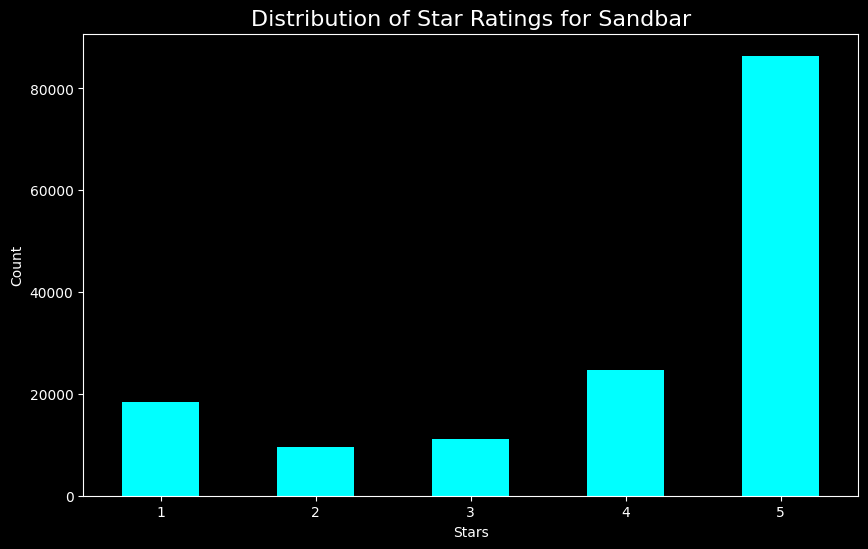

In [5]:
import matplotlib.pyplot as plt

# Dark mode
plt.style.use('dark_background')

# Plot
plt.figure(figsize=(10,6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='cyan')

plt.title('Distribution of Star Ratings for Sandbar', fontsize=16)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [6]:
import re

# Clean text data
def clean_data(df, text_column):

    # Remove missing values
    df = df.dropna(subset=[text_column, 'stars'])

    # Normalize text data
    df[text_column] = df[text_column].str.lower()

    # Remove punctuations and special characters
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'[^A-Za-z\s]','', x))

    return df

df = clean_data(df, text_column='text')
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [7]:
# Check NaN/ missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Missing values in text column: {missing_text}')

Missing values in text column: 0


### **Feature Engineering** Tokenization and Lemmatization

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('punkt_tab')

# Instantiate the stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join the tokens
def preprocess_text_to_token(text):

    # Tokenize text and filter stopwords
    filtered_tokens = [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join tokens into string
    return ' '.join(filtered_tokens)

# Create tokens column and apply preprocessing
df['tokens'] = df['text'].apply(preprocess_text_to_token)

# Check transformation
df[['text', 'tokens']].head()

,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [9]:
from nltk.stem import WordNetLemmatizer

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text => tokens, remove stopwords and join the lemmas
def preprocess_text_to_lemmas(text):

    # Tokenize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join tokens into string
    return ' '.join(lemmas)

# Create tokens column and apply preprocessing
df['lemmas'] = df['text'].apply(preprocess_text_to_lemmas)

# Check transformation
df[['text', 'lemmas']].head()

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [10]:
# Display transformed dataset
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flowers simply best awesome cho...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
- Create a resample dataset for time series analysis

In [11]:
# Convert date into datetime object
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    
    return df

# Convert date to datetime
df = convert_to_datetime(df, date_column='date')

# Set the date as index
df.set_index(df['date'], inplace=True)

# Resample numeric data
def resample_numeric_data(df, interval='ME'): # M stands for months, W weekly, D daily

    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()

    return df_resampled

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='ME')
df_resampled.head()

,stars
date,
2015-01-31,3.936967
2015-02-28,3.932598
2015-03-31,3.923698
2015-04-30,3.962856
2015-05-31,3.933677


In [12]:
# Save the dataframe
output_path = 'data/reviews_processed.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataset saved to: {output_path}')

Processed dataset saved to: data/reviews_processed.csv


In [13]:
# Load clean dataset
file_path = 'data/reviews_processed.csv'
df_resampled = pd.read_csv(file_path, keep_default_na=False) # keep_default_na => keep dropped na earlier

# Check for missing_values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values: {missing_values}')

Number of missing values: date     0
stars    0
dtype: int64


### **Time Series Analysis**

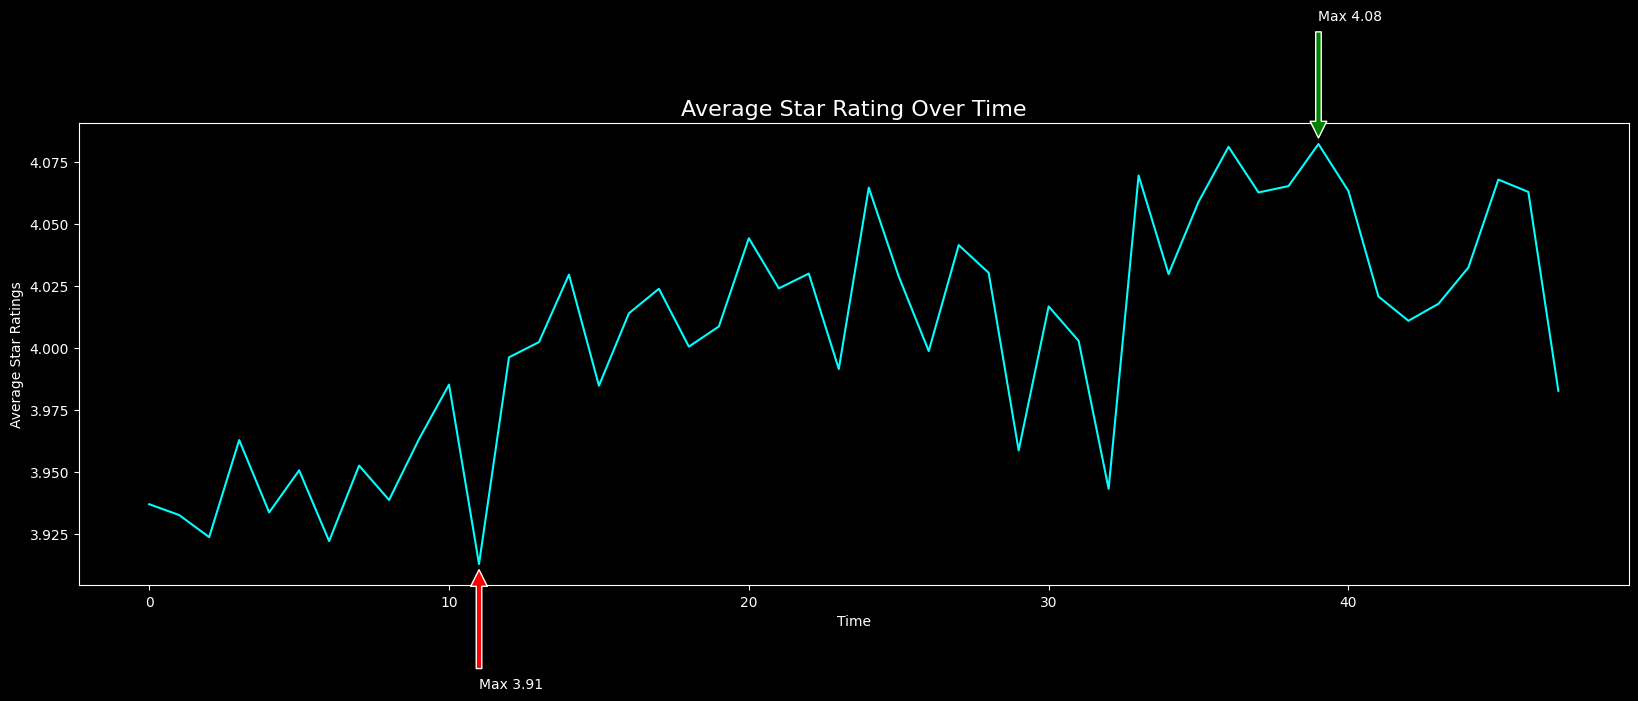

In [21]:
# Annotating the highest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(20,6))
plt.plot(df_resampled.index, df_resampled['stars'], color='cyan')
plt.title('Average Star Rating Over Time', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Average Star Ratings')

# Annotate max value
plt.annotate(f'Max {max_value:.2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05))

# Annotate min value
plt.annotate(f'Max {min_value:.2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05), # minus so there's space below
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()


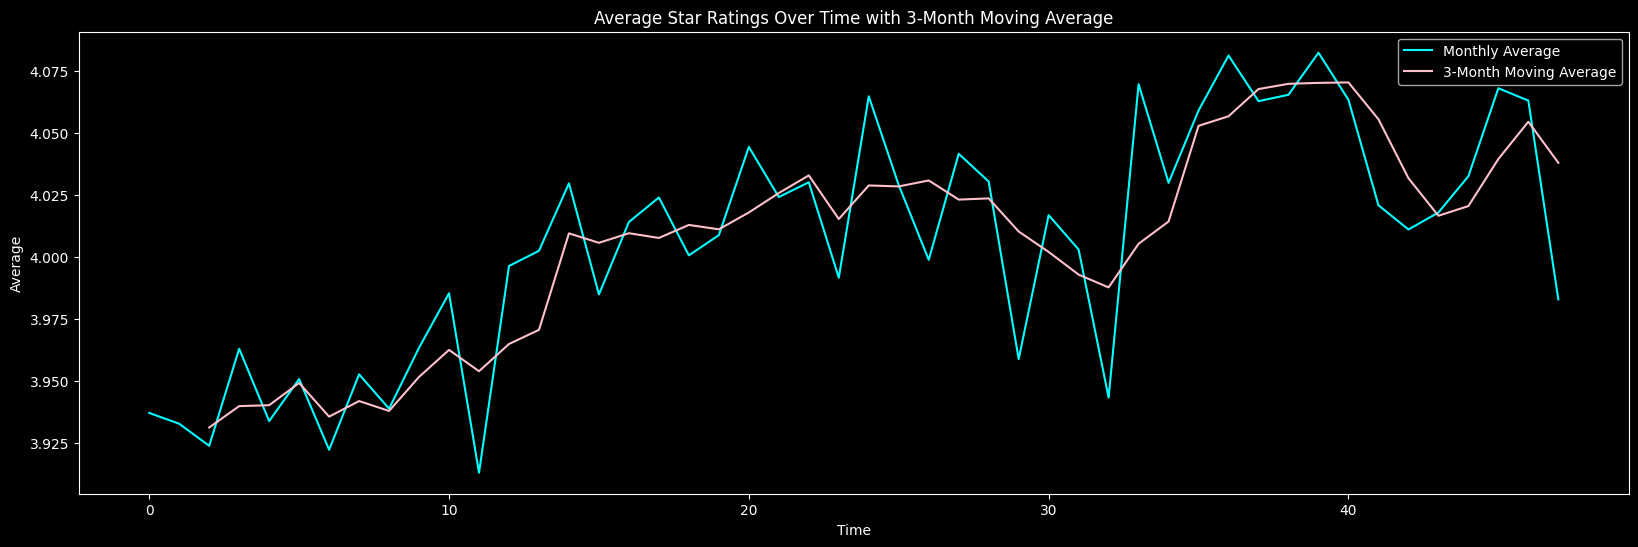

In [23]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(20, 6))
plt.plot(df_resampled.index, df_resampled['stars'], label='Monthly Average', color='cyan')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], label='3-Month Moving Average', color='pink')
plt.title('Average Star Ratings Over Time with 3-Month Moving Average')
plt.xlabel('Time')
plt.ylabel('Average')
plt.legend(loc='best')
plt.show()

### **VADER**

### **Naive Bayes**